In [2]:
import numpy as np

In [5]:
# Make the dataset into a two dimensional array
# The first 6 lines are metadata
ncols = 10800
nrows = 10800
nodata_va = -9999

density_map = np.zeros((nrows, ncols), dtype=np.float32)

with open('gpw_v4_population_density_rev11_2020_30_sec_3.asc', 'rb') as f:
    for x in range(6):
        print(f.readline())
    for rown, line in enumerate(f):
        line = [float(x) for x in line.decode('utf-8').strip().split(" ")]
        for idx, x in enumerate(line):
            if x != -9999:
                density_map[rown, idx] = x




b'ncols         10800\r\n'
b'nrows         10800\r\n'
b'xllcorner     -8.5265128291212e-14\r\n'
b'yllcorner     -4.2632564145606e-14\r\n'
b'cellsize      0.0083333333333333\r\n'
b'NODATA_value  -9999\r\n'


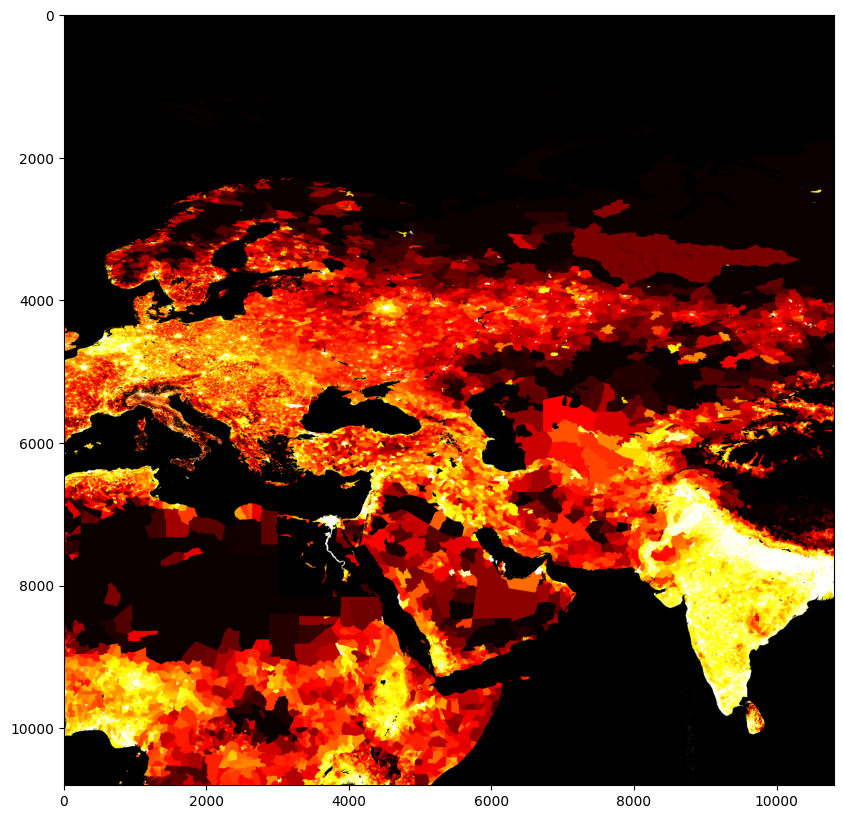

In [6]:
# Create a heatmap from the density map
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

fig, ax = plt.subplots(figsize=(10, 10))
cmap = plt.get_cmap('hot')

# Set the color of the nodata values to black
cmap.set_bad(color='black')

# Plot the values
img = ax.imshow(density_map, cmap=cmap, norm=mcolors.LogNorm(vmin=1, vmax=1000))

In [10]:
# Average the values in the density map above a certain threshold
threshold = 1
sum = 0
count = 0
for x in range(nrows):
    for y in range(ncols):
        if density_map[x, y] > threshold:
            sum += density_map[x, y]
            count += 1

average = sum / count
average

np.float32(89.1047)